# Semaine 9 : Manipulation de données expérimentales avec Python

## Objectifs de la leçon

Apprendre à :
- Lire un fichier CSV contenant des données expérimentales.
- Nettoyer et sauvegarder un nouveau fichier corrigé.
- Manipuler un DataFrame Pandas (sélection, ajout, statistiques).
- Transformer les colonnes en tableaux NumPy pour des calculs scientifiques.
- Visualiser les données sous forme de nuage de points.


## Lecture d’un fichier CSV avec `pandas.read_csv()`

On importe d'abord la bibliothèque **pandas**, puis on lit un fichier CSV.  
Les fichiers CSV européens utilisent souvent la **virgule comme séparateur** et la **virgule comme décimale**.

Pour les lire correctement :
- `delimiter` ou `sep` → définit le séparateur (`;` ou `,`)
- `decimal` → définit le symbole décimal (`','` ou `'.'`)

Exemple avec un petit jeu de données appelé `mesures.csv` :
NB: Le fichier doit se trouver dans le même dossier que le fichier .ipynb et ce dernier doit être ouvert via VS Code (Fichier > Ouvrir > Dossier_contenant_les_deux_fichiers)

In [33]:
import pandas as pd

# Lecture du fichier CSV avec des paramètres adaptés
df = pd.read_csv("mesures.csv", delimiter=";", decimal=",", encoding="utf-8")

# Affichage du DataFrame (NaN pour les valeurs manquantes)
#df

# Affichage des 5 premières lignes
#df.head()

# Affichage des 5 dernières lignes
#df.tail()

# Identification des valeurs manquantes
# df.isna()

## Exportation du fichier corrigé avec `to_csv()`

On peut sauvegarder un **nouveau fichier nettoyé ou corrigé** (par exemple, après conversion ou suppression de lignes invalides).

In [34]:
# Suppression des lignes contenant des valeurs manquantes
# df_corrige = df.dropna()

# OU

# Remplacement des valeurs manquantes par la moyenne de Solubilité
moyenne = df["v"].mean()
df_corrige = df.fillna(moyenne)

# Exportation du fichier nettoyé
df_corrige.to_csv("mesures_corrigees.csv", index=False)
print("Fichier nettoyé enregistré sous 'mesures_corrigees.csv'")

Fichier nettoyé enregistré sous 'mesures_corrigees.csv'


## Manipulation de DataFrames (Pandas)

### Sélection d’une colonne
On peut accéder à une colonne du DataFrame à l’aide des crochets : `df["nom_colonne"]`

In [35]:
# Sélection de colonnes
x = df_corrige["x"]
v = df_corrige["v"]

print(x.head())
print(v.head())

0    0.00
1    0.02
2    0.04
3    0.06
4    0.08
Name: x, dtype: float64
0    0.000000
1    0.976667
2    0.600000
3    0.820000
4    0.960000
Name: v, dtype: float64


### Création d’une nouvelle colonne
On peut créer une nouvelle colonne à partir d’un calcul simple :

In [36]:
# Création d'une colonne énergie cinétique (E = 0.5 * m * v²)
m = 0.25  # masse en kg
df_corrige["E"] = 0.5 * m * (df_corrige["v"] ** 2)
df_corrige.head()

,x,v,E
0,0.00,0.000000,0.000000
1,0.02,0.976667,0.119235
2,0.04,0.600000,0.045000
3,0.06,0.820000,0.084050
4,0.08,0.960000,0.115200


### Affichage de statistiques rapides

In [37]:
df_corrige.describe()

,x,v,E
count,11.000000,11.000000,11.000000
mean,0.100000,0.976667,0.138757
std,0.066332,0.414488,0.083847
min,0.000000,0.000000,0.000000
25%,0.050000,0.890000,0.099625
50%,0.100000,0.976667,0.119235
75%,0.150000,1.220000,0.186250
max,0.200000,1.500000,0.281250


## Manipulation de tableaux NumPy

Il est fréquent de convertir une colonne Pandas en tableau **NumPy** pour des calculs scientifiques plus rapides.

In [38]:
import numpy as np

# Conversion des colonnes en tableaux NumPy
x_np = df_corrige["x"].to_numpy()
v_np = df_corrige["v"].to_numpy()

print(type(x_np))
print(x_np[:5])

<class 'numpy.ndarray'>
[0.   0.02 0.04 0.06 0.08]


## Visualisation : Nuage de points

On utilise **matplotlib.pyplot** pour visualiser les données expérimentales.

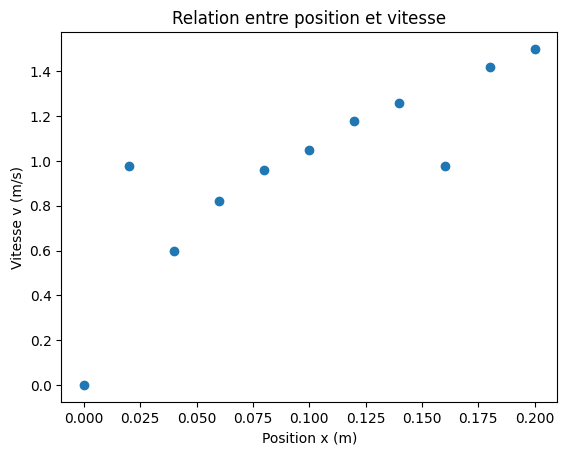

In [39]:
import matplotlib.pyplot as plt

plt.scatter(x_np, v_np)
plt.xlabel('Position x (m)')
plt.ylabel('Vitesse v (m/s)')
plt.title('Relation entre position et vitesse')
plt.show()